<a href="https://colab.research.google.com/github/Noor-sayyed/Group_08_DW-BI/blob/main/data_warehouse_group_coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Data Warehousing and Business Intelligence   Group coursework


In [3]:
#Task 1
#1 Identify and remove null values;

import pandas as pd

# Load dataset in to dataframe df
df = pd.read_csv("/content/bank_transactions.csv")
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
# Drop rows with nulls in critical columns
df.dropna(
    subset=['TransactionID',	'CustomerID',	'CustomerDOB'	,'CustGender',	'CustLocation',	'CustAccountBalance',	'TransactionDate'	,'TransactionTime', 'TransactionAmount (INR)'],
    inplace=True
)
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 79.5+ MB


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [5]:
#2 	Identify and remove invalid transaction amount values;

# Identify and remove invalid transaction amounts (e.g., negative values or zero)
df1 = df[df['TransactionAmount (INR)'] > 0]
df1.describe()


,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.040794e+06,1.040794e+06,1.040794e+06
mean,1.149199e+05,1.571710e+05,1.567330e+03
std,8.464375e+05,5.122954e+04,6.563901e+03
min,0.000000e+00,0.000000e+00,1.000000e-02
25%,4.728540e+03,1.241032e+05,1.614700e+02
50%,1.676385e+04,1.643050e+05,4.589000e+02
75%,5.739893e+04,2.000278e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [6]:
print(df1['CustomerDOB'].dtype)
print(df1['CustomerDOB'].unique()[:20])  # Print the first 20 unique values

object
['10/1/94' '4/4/57' '26/11/96' '14/9/73' '24/3/88' '8/10/72' '26/1/92'
 '27/1/82' '19/4/88' '22/6/84' '22/7/82' '7/7/88' '13/6/78' '5/1/92'
 '24/3/78' '10/7/68' '1/1/1800' '16/7/89' '11/1/91' '24/6/85']


In [7]:
#3 	Identify and remove invalid age values;
# Convert 'CustomerDOB' to datetime objects
df1['CustomerDOB'] = pd.to_datetime(df1['CustomerDOB'],  errors='coerce')

<ipython-input-7-8da6d3272a8b>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['CustomerDOB'] = pd.to_datetime(df1['CustomerDOB'],  errors='coerce')
<ipython-input-7-8da6d3272a8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CustomerDOB'] = pd.to_datetime(df1['CustomerDOB'],  errors='coerce')


In [8]:
# Calculate age based on current date
current_date = pd.to_datetime('today')
df1['Age'] = (current_date - df1['CustomerDOB']).dt.days // 365

<ipython-input-8-8fd8517afffa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = (current_date - df1['CustomerDOB']).dt.days // 365


In [9]:
# Remove rows with invalid ages (e.g., negative or unrealistic ages)
df1 = df1[(df1['Age'] > 15) & (df1['Age'] < 100)] # Adjust the upper limit as needed
df1['Age']

,Age
0,30
2,28
4,37
6,33
7,43
...,...
1048562,34
1048563,33
1048564,35
1048565,46


In [10]:

# Display the 5 top locations with the maximum number of transactions
if 'CustLocation' in df1.columns:
  top_locations = df1['CustLocation'].value_counts().nlargest(5)
  print(top_locations)
else:
    print("Location column not found in the DataFrame.")



CustLocation
MUMBAI       86278
BANGALORE    70701
NEW DELHI    66184
GURGAON      62750
DELHI        60492
Name: count, dtype: int64


In [11]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Index: 879751 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            879751 non-null  object        
 1   CustomerID               879751 non-null  object        
 2   CustomerDOB              879751 non-null  datetime64[ns]
 3   CustGender               879751 non-null  object        
 4   CustLocation             879751 non-null  object        
 5   CustAccountBalance       879751 non-null  float64       
 6   TransactionDate          879751 non-null  object        
 7   TransactionTime          879751 non-null  int64         
 8   TransactionAmount (INR)  879751 non-null  float64       
 9   Age                      879751 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 73.8+ MB


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,30
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0,28
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,37
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2/8/16,173806,566.0,33
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,170537,148.0,43


Compute Recency, Frequency, and Monetary values per customer.

In [12]:
#5.	Write a query to define and calculate the  RFM values per Customer;
import pandas as pd
import sqlite3
df1

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,30
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0,28
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,37
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2/8/16,173806,566.0,33
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,170537,148.0,43
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,18/9/16,184824,799.0,34
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,18/9/16,183734,460.0,33
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,18/9/16,183313,770.0,35
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0,46


In [13]:
# connect to database
conn = sqlite3.connect("RFMdb")
cur = conn.cursor()

In [14]:
# load CRM data into the RFMdb database
df1.to_sql("data", conn)

879751

In [15]:
# CHECK IF DATA INSERTED INTO data/RFMdb
df_RFMdb = pd.read_sql('SELECT * FROM data', conn)
df_RFMdb

,index,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,0,T1,C5841053,1994-10-01 00:00:00,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,30
1,2,T3,C4417068,1996-11-26 00:00:00,F,MUMBAI,17874.44,2/8/16,142712,459.0,28
2,4,T5,C9031234,1988-03-24 00:00:00,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,37
3,6,T7,C7126560,1992-01-26 00:00:00,F,MUMBAI,973.46,2/8/16,173806,566.0,33
4,7,T8,C1220223,1982-01-27 00:00:00,M,MUMBAI,95075.54,2/8/16,170537,148.0,43
...,...,...,...,...,...,...,...,...,...,...,...
879746,1048562,T1048563,C8020229,1990-08-04 00:00:00,M,NEW DELHI,7635.19,18/9/16,184824,799.0,34
879747,1048563,T1048564,C6459278,1992-02-20 00:00:00,M,NASHIK,27311.42,18/9/16,183734,460.0,33
879748,1048564,T1048565,C6412354,1989-05-18 00:00:00,M,HYDERABAD,221757.06,18/9/16,183313,770.0,35
879749,1048565,T1048566,C6420483,1978-08-30 00:00:00,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0,46


In [16]:
df_RFMdb1 = pd.read_sql('''
SELECT
        CustomerID,
        MAX(TransactionDate) as LatestTransactionDate -- Find the most recent transaction date for each customer
    FROM data
    GROUP BY CustomerID
''',conn)
df_RFMdb1

,CustomerID,LatestTransactionDate
0,C1010011,9/8/16
1,C1010012,14/8/16
2,C1010014,7/8/16
3,C1010018,15/9/16
4,C1010028,29/8/16
...,...,...
761377,C9099836,7/8/16
761378,C9099877,15/9/16
761379,C9099919,18/8/16
761380,C9099941,28/8/16


In [23]:
df_RFMdb = pd.read_sql('''
    WITH aggregated_data AS (
        SELECT
            CustomerID,
            julianday(MAX(TransactionDate)) - julianday(MIN(TransactionDate)) AS recency_raw,
            COUNT(TransactionID) AS frequency_raw,
            SUM("TransactionAmount (INR)") AS monetary_raw
        FROM data
        GROUP BY CustomerID
    )
    SELECT
        CustomerID,
        NTILE(4) OVER (ORDER BY recency_raw DESC) AS rfm_recency,
        NTILE(4) OVER (ORDER BY frequency_raw) AS rfm_frequency,
        NTILE(4) OVER (ORDER BY monetary_raw) AS rfm_monetary,
        (NTILE(4) OVER (ORDER BY recency_raw DESC) * 100) +
        (NTILE(4) OVER (ORDER BY frequency_raw) * 10) +
        NTILE(4) OVER (ORDER BY monetary_raw) AS rfm_combined
    FROM aggregated_data
''', conn)

In [25]:
#clean the data and calculate rfm values


df_RFMdb = pd.read_sql(''' SELECT CustomerID, rfm_recency, rfm_frequency, rfm_monetary, rfm_recency*100 + rfm_frequency*10 + rfm_monetary AS rfm_combined
    FROM
     ( SELECT CustomerID,
             NTILE(4) OVER (ORDER BY TransactionDate) AS rfm_recency,
             NTILE(4) OVER (ORDER BY TransactionID) AS rfm_frequency,
             NTILE(4) OVER (ORDER BY "TransactionAmount (INR)") AS rfm_monetary
      FROM
            data
            )
 ''', conn)

In [27]:
df_RFMdb

,CustomerID,rfm_recency,rfm_frequency,rfm_monetary,rfm_combined
0,C3629234,1,1,4,114
1,C4594950,1,1,2,112
2,C4548131,1,1,1,111
3,C5839260,1,1,3,113
4,C6937444,1,1,4,114
...,...,...,...,...,...
879746,C6119313,4,4,4,444
879747,C8115774,4,4,1,441
879748,C2312784,4,4,2,442
879749,C3737058,4,4,3,443


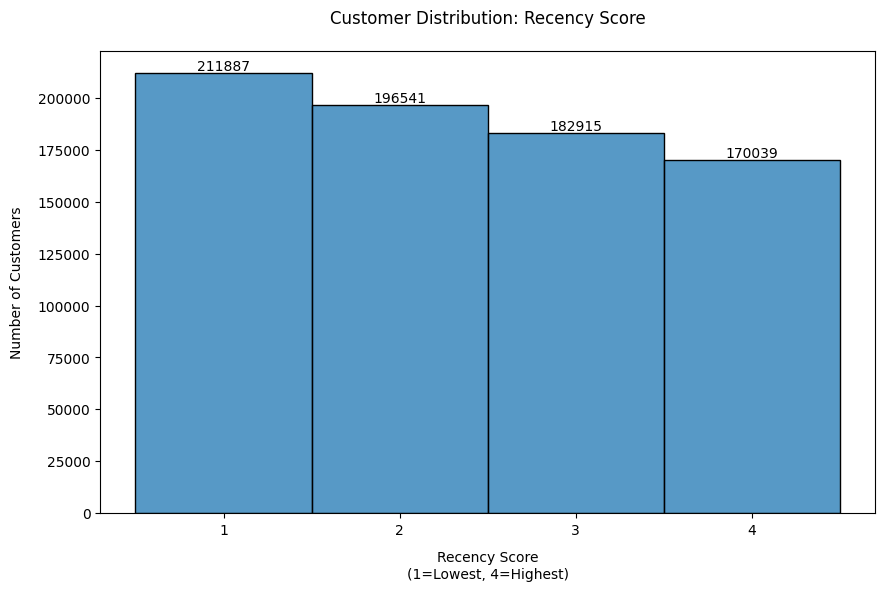

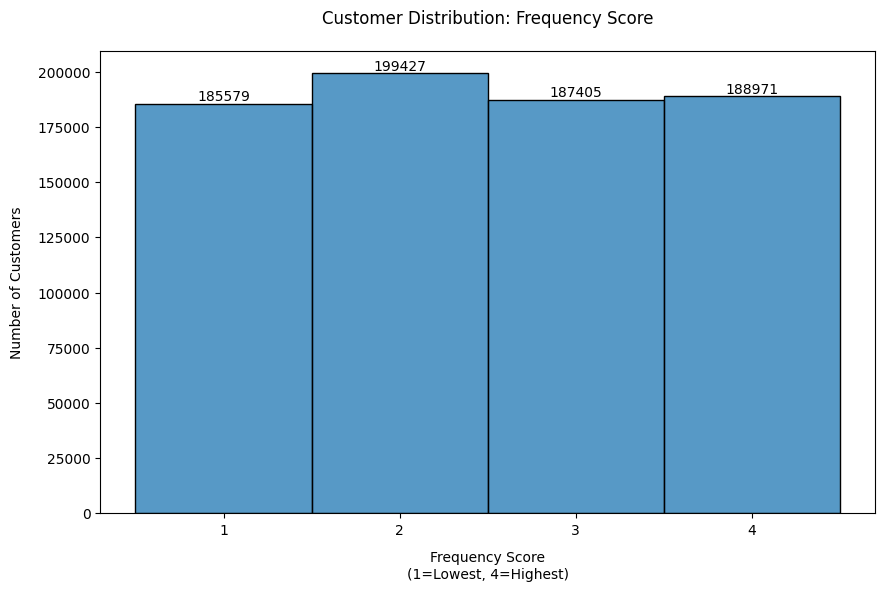

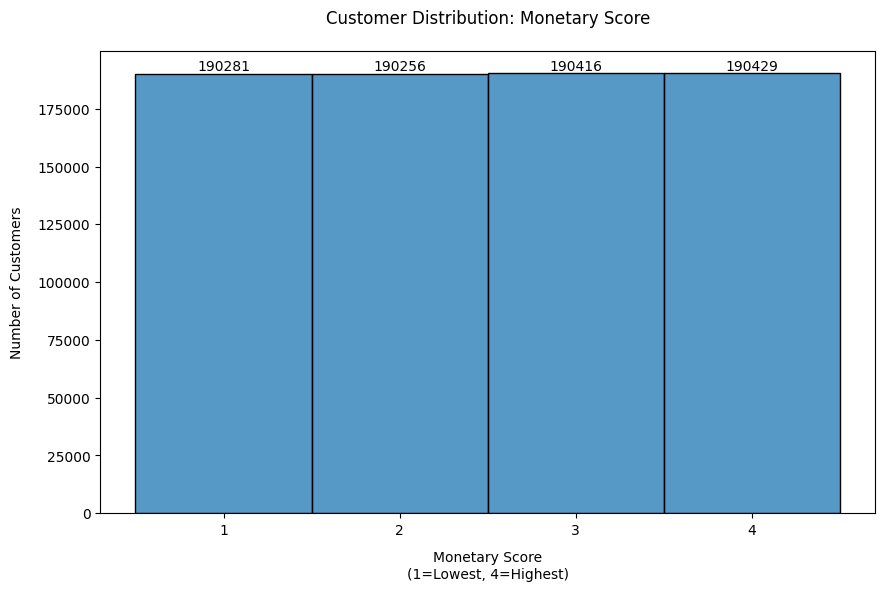

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ensure 1 row per customer
customer_rfm = df_RFMdb.groupby('CustomerID')[['rfm_recency', 'rfm_frequency', 'rfm_monetary']].first().reset_index()

# 2. Plot properly aligned distributions
def plot_customer_rfm(score_type, title):
    plt.figure(figsize=(10, 6))

    # Force discrete bins and alignment
    ax = sns.histplot(data=customer_rfm,
                    x=score_type,
                    bins=[0.5, 1.5, 2.5, 3.5, 4.5],
                    discrete=True,
                    kde=False)

    plt.title(f'Customer Distribution: {title} Score', pad=20)
    plt.xlabel(f'{title} Score\n(1=Lowest, 4=Highest)', labelpad=10)
    plt.ylabel('Number of Customers', labelpad=10)
    plt.xticks([1, 2, 3, 4])

    # Add value labels
    for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height + 5,
                f'{int(height)}',
                ha='center', va='bottom')

    plt.show()

# Generate all three plots
plot_customer_rfm('rfm_recency', 'Recency')
plot_customer_rfm('rfm_frequency', 'Frequency')
plot_customer_rfm('rfm_monetary', 'Monetary')

In [33]:
#Null check
print("Remaining Nulls:\n", customer_rfm.isnull().sum())
# Calculate minimum and maximum age for each customer
customer_age = df1.groupby('CustomerID')['Age'].agg(['min', 'max'])

# Rename columns for clarity
customer_age.rename(columns={'min': 'MinAge', 'max': 'MaxAge'}, inplace=True)

# Merge age information into rfm DataFrame
rfm = pd.merge(rfm, customer_age, left_index=True, right_index=True)

# Now you can access 'MinAge' and 'MaxAge' in rfm
print("Age Range:", rfm['MinAge'].min(), "-", rfm['MaxAge'].max())
#RFM summary
print(rfm[['Recency', 'Frequency', 'MonetaryValue']].describe())

Remaining Nulls:
 CustomerID       0
rfm_recency      0
rfm_frequency    0
rfm_monetary     0
dtype: int64


NameError: name 'rfm' is not defined

B.	Customer segmentation with k-means: